In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 적재

In [18]:
# 조회용 dictionary
# 3, 4번 폴더는 가구, 개인 국내기타여행 자료라 제외

data_dict = {'data_0_01': '응답자 특성_가구', 'data_0_02': '응답자 특성_개인',
             'data_1_01': '가구_국내관광+해외관광_단위여행', 'data_1_02': '가구_국내관광+해외관광_방문지',
             'data_1_03': '가구_국내관광+해외관광_함께 여행한 가구원',
             'data_2_01': '개인_국내관광+해외관광_단위여행', 'data_2_02': '개인_국내관광+해외관광_방문지',
             'data_5_01': '2017년 국민여행 실태조사_데이터_단위',
             'data_5_02': '2017년 국민여행 실태조사_데이터_방문지'}

## 0. 응답자 특성

In [3]:
data_0_01 = pd.read_excel('C:/Users/user/Desktop/kdata/프로젝트/2017년 국민여행실태조사 데이터/0. 응답자 특성/1. 응답자 특성_가구.xlsx')
data_0_02 = pd.read_excel('C:/Users/user/Desktop/kdata/프로젝트/2017년 국민여행실태조사 데이터/0. 응답자 특성/1. 응답자 특성_개인.xlsx')

In [4]:
# column명 변경

data_0_01.columns = ['가구번호', ' 주택유형', '거주시도', '지역규모', '가구내 가구원수',
                     '년 평균 가구소득', '월 평균 가구소득', '가중치']
data_0_02.columns = ['가구번호', '가구원번호', '성별', '연령', '주택유형', '거주시도',
                     '지역규모', '최종학력', '졸업여부', '직업(텍스트)', '직업분류1',
                     '직업분류2', '가구내 가구원수', '혼인상태', '년 평균 가구소득',
                     '월 평균 가구소득', '가중치']

In [21]:
data_0_02.head()

,가구번호,가구원번호,성별,연령,주택유형,거주시도,지역규모,최종학력,졸업여부,직업(텍스트),직업분류1,직업분류2,가구내 가구원수,혼인상태,년 평균 가구소득,월 평균 가구소득,가중치
0,10001,1000101,1,40,2,1,1,5,5,NaN,2,8,4,2,4000,333.333333,6201.607951
1,10001,1000102,2,40,2,1,1,4,1,NaN,11,9,4,2,4000,333.333333,5886.547371
2,10002,1000201,1,41,1,1,1,6,1,NaN,4,3,3,1,4000,333.000000,12044.610408
3,10002,1000202,2,73,1,1,1,2,1,NaN,11,9,3,3,4000,333.000000,5436.667739
4,10002,1000203,2,46,1,1,1,4,1,NaN,9,5,3,2,4000,333.000000,12405.209670


## 1. 가구_국내관광+해외관광

In [22]:
data_1_01 = pd.read_excel('./data/2017년 국민여행실태조사 데이터/1. 가구_국내관광+해외관광/1. 가구_국내관광+해외관광_단위여행.xlsx')
data_1_02 = pd.read_excel('./data/2017년 국민여행실태조사 데이터/1. 가구_국내관광+해외관광/2. 가구_국내관광+해외관광_방문지.xlsx')
data_1_03 = pd.read_excel('./data/2017년 국민여행실태조사 데이터/1. 가구_국내관광+해외관광/3. 가구_국내관광+해외관광_함께 여행한 가구원.xlsx')

In [23]:
# column명 변경

data_1_01.columns = ['가구번호', '여행구분1', '여행구분2', '여행 월', '매칭 ID',
                     '당일/숙박여행 여부', '여행 출발 년', '여행 출발 월', 
                     '여행 출발 일', '여행 도착 년', '여행 도착 월', '여행 도착 일',
                     '여행 박', '여행 일', '여행 시기 주중', '여행 시기 주말',
                     '여행 시기 휴가/방학', '여행 시기 설날/추석', '여행 시기 공휴일',
                     '여행 주 목적', '여행 정보 주요 획득지 1순위',
                     '여행 정보 주요 획득지 2순위', '참고한 인터넷 사이트 1순위',
                     '참고한 인터넷 사이트 2순위', '동반자 수 동거 가족이나 친척',
                     '동반자 수 비동거 가족이나 친척', '동반자 수 그 외 동행자',
                     '그 외 동행자 유형 친구/연인', '그 외 동행자 유형 (직장)동료',
                     '그 외 동행자 유형 단체/모임', '그 외 동행자 유형 기타',
                     '총 지출비용', '사전 지출비용', '단체비용', '여행사 상품구입비',
                     '숙박비', '교통비', '식/음료비', '문화/오락시설 이용료/관람료',
                     '스포츠/레포츠 용품대여/구입비, 경기관람료', '기념품 및 쇼핑비',
                     '여행지에서 여행관련용품 구입비', '기타비용',
                     '여행 출발 전 사전예약을 통해 이용한 서비스 여부',
                     '사전예약을 한 서비스 숙박시설', '사전예약을 한 서비스 교통수단',
                     '사전예약을 한 서비스 차량대여/렌트', '사전예약을 한 서비스 관광명소',
                     '사전예약을 한 서비스 레저시설', '사전예약을 한 서비스 체험프로그램',
                     '사전예약을 한 서비스 기타', '여행상품 구매 또는 이용 여부',
                     '구매한 여행상품', '구매한 여행상품 부분 패키지 상품(교통)',
                     '구매한 여행상품 부분 패키지 상품(차량임대)',
                     '구매한 여행상품 부분 패키지 상품(숙박시설)',
                     '구매한 여행상품 부분 패키지 상품(레저시설)',
                     '구매한 여행상품 부분 패키지 상품(기타)',
                     '단체회비/단체경비에 여행상품 구매 비용 포함 여부',
                     '항목별 만족도 자연경관', '항목별 만족도 문화유산', 
                     '항목별 만족도 교통', '항목별 만족도 숙박시설', 
                     '항목별 만족도 식당 및 음식', '항목별 만족도 쇼핑', 
                     '항목별 만족도 관광정보 및 안내시설', '항목별 만족도 관광지 편의시설',
                     '항목별 만족도 지역 관광종사자의 친절성', '항목별 만족도 체험프로그램',
                     '항목별 만족도 관광지 물가', '항목별 만족도 관광지 혼잡도', '가중치']

data_1_02.columns = ['가구번호', '여행구분1', '여행구분2', '여행 월', '매칭 ID', 
                     '여행한 광역시/도(헤외여행: 국가)', '여행한 광역시/도 내 시/군1(해외여행: 도시)',
                     '여행한 광역시/도 내 시/군2(해외여행: 도시)', '여행한 광역시/도 내 시/군3(해외여행: 도시)',
                     '여행한 광역시/도 내 시/군4(해외여행: 도시)', '여행한 광역시/도 내 시/군5(해외여행: 도시)',
                     '여행한 광역시/도 내 시/군6(해외여행: 도시)', '여행한 광역시/도 내 시/군7(해외여행: 도시)',
                     '여행한 광역시/도 내 시/군8(해외여행: 도시)', '여행지별 여행일수', '여행지 선택이유 1순위',
                     '여행지 선택이유 2순위', '여행지 선택이유 3순위', '주요 이동(교통)수단', 
                     '숙박시설 숙박하지 않음', '숙박시설 호텔', '숙박시설 콘도미니엄', '숙박시설 유스호스텔',
                     '숙박시설 모텔/여관', '숙박시설 펜션', '숙박시설 민박', '숙박시설 야영', 
                     '숙박시설 자연휴양림 내 숙박시설', '숙박시설 가족/친지집', '숙박시설 연수원/수련원',
                     '숙박시설 전통한옥숙박시설', '숙박시설 기타', '숙박시설 별 숙박 박수 숙박하지 않음',
                     '숙박시설 별 숙박 박수 호텔', '숙박시설 별 숙박 박수 콘도미니엄',
                     '숙박시설 별 숙박 박수 유스호스텔', '숙박시설 별 숙박 박수 모텔/여관',
                     '숙박시설 별 숙박 박수 펜션', '숙박시설 별 숙박 박수 민박', '숙박시설 별 숙박 박수 야영',
                     '숙박시설 별 숙박 박수 자연휴양림 내 숙박시설', '숙박시설 별 숙박 박수 가족/친지집',
                     '숙박시설 별 숙박 박수 연수원/수련원', '숙박시설 별 숙박 박수 전통한옥숙박시설', 
                     '숙박시설 별 숙박 박수 기타', '여행지에서의 활동 자연 및 풍경 감상',
                     '여행지에서의 활동 음식관광', '여행지에서의 활동 야외 위락 및 스포츠 활동',
                     '여행지에서의 활동 역사유적지 방문', '여행지에서의 활동 테마파크, 놀이시설, 동/식물원 방문',
                     '여행지에서의 활동 휴식/휴양', '여행지에서의 활동 온천/스파', '여행지에서의 활동 쇼핑',
                     '여행지에서의 활동 지역 문화예술/공연/전시시설 관람', '여행지에서의 활동 스포츠 경기 관람',
                     '여행지에서의 활동 지역 축제/이벤트 참가', '여행지에서의 활동 교육/체험프로그램 참가',
                     '여행지에서의 활동 종교/성지순례', '여행지에서의 활동 갬블링', '여행지에서의 활동 시티투어',
                     '여행지에서의 활동 드라마 촬영지 방문', '여행지에서의 활동 가족/친지/친구 방문',
                     '여행지에서의 활동 회의참가/시찰', '여행지에서의 활동 교육/훈련/연수', 
                     '여행지에서의 활동 유흥/오락', '여행지에서의 활동 기타', '전반적 만족도', '재방문 의향',
                     '타인 추천의향', '여행지에서 지출비용', '가중치']

data_1_03.columns = ['가구번호', '가구원번호', '여행구분1', '여행 월', '매칭 ID']

In [24]:
data_1_03.head()

,가구번호,가구원번호,여행구분1,여행 월,매칭 ID
0,11200,1120002,1,8,100129
1,11200,1120001,1,8,100129
2,11200,1120002,1,8,100130
3,11200,1120001,1,8,100130
4,11200,1120004,1,8,100130


## 2. 개인_국내관광+해외관광

In [25]:
data_2_01 = pd.read_excel('./data/2017년 국민여행실태조사 데이터/2. 개인_국내관광+해외관광/1. 개인_국내관광+해외관광_단위여행.xlsx')
data_2_02 = pd.read_excel('./data/2017년 국민여행실태조사 데이터/2. 개인_국내관광+해외관광/2. 개인_국내관광+해외관광_방문지.xlsx')

In [26]:
#column명 변경

data_2_01.columns = ['가구번호', '가구원번호', '여행구분1', '여행구분2', '여행 월', 
                     '매칭 ID', '당일/숙박여행 여부', '여행 출발 년', '여행 출발 월', 
                     '여행 출발 일', '여행 도착 년', '여행 도착 월', '여행 도착 일',
                     '여행 박', '여행 일', '여행 시기 주중', '여행 시기 주말',
                     '여행 시기 휴가/방학', '여행 시기 설날/추석', '여행 시기 공휴일',
                     '여행 주 목적', '여행 정보 주요 획득지 1순위',
                     '여행 정보 주요 획득지 2순위', '참고한 인터넷 사이트 1순위',
                     '참고한 인터넷 사이트 2순위', '함께 여행한 일행 존재 여부',
                     '본인을 제외한 함께 여행한 일행 수', '동행한 사람과의 관계 친구/연인', 
                     '동행한 사람과의 관계 (직장)동료', '동행한 사람과의 관계 단체/모임', 
                     '동행한 사람과의 관계 비동거가족', '동행한 사람과의 관계 친척',
                     '동행한 사람과의 관계 기타', '총 지출비용', '사전 지출비용', 
                     '단체비용', '여행사 상품구입비', '숙박비', '교통비', '식/음료비', 
                     '문화/오락시설 이용료/관람료', '스포츠/레포츠 용품대여/구입비, 경기관람료', 
                     '기념품 및 쇼핑비', '여행지에서 여행관련용품 구입비', '기타비용',
                     '여행 출발 전 사전예약을 통해 이용한 서비스 여부',
                     '사전예약을 한 서비스 숙박시설', '사전예약을 한 서비스 교통수단',
                     '사전예약을 한 서비스 차량대여/렌트', '사전예약을 한 서비스 관광명소',
                     '사전예약을 한 서비스 레저시설', '사전예약을 한 서비스 체험프로그램',
                     '사전예약을 한 서비스 기타', '여행상품 구매 또는 이용 여부',
                     '구매한 여행상품', '구매한 여행상품 부분 패키지 상품(교통)',
                     '구매한 여행상품 부분 패키지 상품(차량임대)',
                     '구매한 여행상품 부분 패키지 상품(숙박시설)',
                     '구매한 여행상품 부분 패키지 상품(레저시설)',
                     '구매한 여행상품 부분 패키지 상품(기타)',
                     '단체회비/단체경비에 여행상품 구매 비용 포함 여부',
                     '항목별 만족도 자연경관', '항목별 만족도 문화유산', 
                     '항목별 만족도 교통', '항목별 만족도 숙박시설', 
                     '항목별 만족도 식당 및 음식', '항목별 만족도 쇼핑', 
                     '항목별 만족도 관광정보 및 안내시설', '항목별 만족도 관광지 편의시설',
                     '항목별 만족도 지역 관광종사자의 친절성', '항목별 만족도 체험프로그램',
                     '항목별 만족도 관광지 물가', '항목별 만족도 관광지 혼잡도', '가중치']

data_2_02.columns = ['가구번호', '가구원번호', '여행구분1', '여행구분2', '여행 월', '매칭 ID', 
                     '여행한 광역시/도(헤외여행: 국가)', '여행한 광역시/도 내 시/군1(해외여행: 도시)',
                     '여행한 광역시/도 내 시/군2(해외여행: 도시)', '여행한 광역시/도 내 시/군3(해외여행: 도시)',
                     '여행한 광역시/도 내 시/군4(해외여행: 도시)', '여행한 광역시/도 내 시/군5(해외여행: 도시)',
                     '여행한 광역시/도 내 시/군6(해외여행: 도시)', '여행한 광역시/도 내 시/군7(해외여행: 도시)',
                     '여행한 광역시/도 내 시/군8(해외여행: 도시)', '여행지별 여행일수', '여행지 선택이유 1순위',
                     '여행지 선택이유 2순위', '여행지 선택이유 3순위', '주요 이동(교통)수단', 
                     '숙박시설 숙박하지 않음', '숙박시설 호텔', '숙박시설 콘도미니엄', '숙박시설 유스호스텔',
                     '숙박시설 모텔/여관', '숙박시설 펜션', '숙박시설 민박', '숙박시설 야영', 
                     '숙박시설 자연휴양림 내 숙박시설', '숙박시설 가족/친지집', '숙박시설 연수원/수련원',
                     '숙박시설 전통한옥숙박시설', '숙박시설 기타', '숙박시설 별 숙박 박수 숙박하지 않음',
                     '숙박시설 별 숙박 박수 호텔', '숙박시설 별 숙박 박수 콘도미니엄',
                     '숙박시설 별 숙박 박수 유스호스텔', '숙박시설 별 숙박 박수 모텔/여관',
                     '숙박시설 별 숙박 박수 펜션', '숙박시설 별 숙박 박수 민박', '숙박시설 별 숙박 박수 야영',
                     '숙박시설 별 숙박 박수 자연휴양림 내 숙박시설', '숙박시설 별 숙박 박수 가족/친지집',
                     '숙박시설 별 숙박 박수 연수원/수련원', '숙박시설 별 숙박 박수 전통한옥숙박시설', 
                     '숙박시설 별 숙박 박수 기타', '여행지에서의 활동 자연 및 풍경 감상',
                     '여행지에서의 활동 음식관광', '여행지에서의 활동 야외 위락 및 스포츠 활동',
                     '여행지에서의 활동 역사유적지 방문', '여행지에서의 활동 테마파크, 놀이시설, 동/식물원 방문',
                     '여행지에서의 활동 휴식/휴양', '여행지에서의 활동 온천/스파', '여행지에서의 활동 쇼핑',
                     '여행지에서의 활동 지역 문화예술/공연/전시시설 관람', '여행지에서의 활동 스포츠 경기 관람',
                     '여행지에서의 활동 지역 축제/이벤트 참가', '여행지에서의 활동 교육/체험프로그램 참가',
                     '여행지에서의 활동 종교/성지순례', '여행지에서의 활동 갬블링', '여행지에서의 활동 시티투어',
                     '여행지에서의 활동 드라마 촬영지 방문', '여행지에서의 활동 가족/친지/친구 방문',
                     '여행지에서의 활동 회의참가/시찰', '여행지에서의 활동 교육/훈련/연수', 
                     '여행지에서의 활동 유흥/오락', '여행지에서의 활동 기타', '전반적 만족도', '재방문 의향',
                     '타인 추천의향', '여행지에서 지출비용', '가중치']

In [27]:
data_2_02.head()

,가구번호,가구원번호,여행구분1,여행구분2,여행 월,매칭 ID,여행한 광역시/도(헤외여행: 국가),여행한 광역시/도 내 시/군1(해외여행: 도시),여행한 광역시/도 내 시/군2(해외여행: 도시),여행한 광역시/도 내 시/군3(해외여행: 도시),...,여행지에서의 활동 가족/친지/친구 방문,여행지에서의 활동 회의참가/시찰,여행지에서의 활동 교육/훈련/연수,여행지에서의 활동 유흥/오락,여행지에서의 활동 기타,전반적 만족도,재방문 의향,타인 추천의향,여행지에서 지출비용,가중치
0,10001,1000101,1,2.0,8.0,115439.0,931.0,10.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,100000.0,6201.607951
1,10001,1000102,1,2.0,12.0,115441.0,931.0,260.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,100000.0,5886.547371
2,10002,1000203,1,2.0,10.0,123587.0,932.0,30.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,600000.0,12405.209670
3,10002,1000201,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10002,1000202,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 5. 개인화

In [5]:
data_5_01 = pd.read_excel('C:/Users/user/Desktop/kdata/프로젝트/2017년 국민여행실태조사 데이터/5. 개인화/2017년 국민여행 실태조사_데이터_단위.xlsx')
data_5_02 = pd.read_excel('C:/Users/user/Desktop/kdata/프로젝트/2017년 국민여행실태조사 데이터/5. 개인화/2017년 국민여행 실태조사_데이터_방문지.xlsx') 

In [7]:
# column명 변경
# data_5_01의 'gubun' column에 대한 정보가 없음
# gubun: 1번이 가구, 2번이 개인 으로 추정됨

data_5_01.columns = ['gubun', '가구번호', '가구원번호', '여행구분1', '여행구분2', '여행 월', 
                     '매칭 ID', '당일/숙박여행 여부', '여행 출발 년', '여행 출발 월', 
                     '여행 출발 일', '여행 도착 년', '여행 도착 월', '여행 도착 일',
                     '여행 박', '여행 일', '여행 시기 주중', '여행 시기 주말',
                     '여행 시기 휴가/방학', '여행 시기 설날/추석', '여행 시기 공휴일',
                     '여행 주 목적', '여행 정보 주요 획득지 1순위',
                     '여행 정보 주요 획득지 2순위', '참고한 인터넷 사이트 1순위',
                     '참고한 인터넷 사이트 2순위', '함께 여행한 일행 존재 여부',
                     '본인을 제외한 함께 여행한 일행 수', '동행한 사람과의 관계 친구/연인', 
                     '동행한 사람과의 관계 (직장)동료', '동행한 사람과의 관계 단체/모임', 
                     '동행한 사람과의 관계 비동거가족', '동행한 사람과의 관계 친척',
                     '동행한 사람과의 관계 기타', '총 지출비용', '사전 지출비용', 
                     '단체비용', '여행사 상품구입비', '숙박비', '교통비', '식/음료비', 
                     '문화/오락시설 이용료/관람료', '스포츠/레포츠 용품대여/구입비, 경기관람료', 
                     '기념품 및 쇼핑비', '여행지에서 여행관련용품 구입비', '기타비용',
                     '여행 출발 전 사전예약을 통해 이용한 서비스 여부',
                     '사전예약을 한 서비스 숙박시설', '사전예약을 한 서비스 교통수단',
                     '사전예약을 한 서비스 차량대여/렌트', '사전예약을 한 서비스 관광명소',
                     '사전예약을 한 서비스 레저시설', '사전예약을 한 서비스 체험프로그램',
                     '사전예약을 한 서비스 기타', '여행상품 구매 또는 이용 여부',
                     '구매한 여행상품', '구매한 여행상품 부분 패키지 상품(교통)',
                     '구매한 여행상품 부분 패키지 상품(차량임대)',
                     '구매한 여행상품 부분 패키지 상품(숙박시설)',
                     '구매한 여행상품 부분 패키지 상품(레저시설)',
                     '구매한 여행상품 부분 패키지 상품(기타)',
                     '단체회비/단체경비에 여행상품 구매 비용 포함 여부',
                     '항목별 만족도 자연경관', '항목별 만족도 문화유산', 
                     '항목별 만족도 교통', '항목별 만족도 숙박시설', 
                     '항목별 만족도 식당 및 음식', '항목별 만족도 쇼핑', 
                     '항목별 만족도 관광정보 및 안내시설', '항목별 만족도 관광지 편의시설',
                     '항목별 만족도 지역 관광종사자의 친절성', '항목별 만족도 체험프로그램',
                     '항목별 만족도 관광지 물가', '항목별 만족도 관광지 혼잡도', '가중치']

data_5_02.columns = ['가구번호', '가구원번호', '여행구분1', '여행구분2', '여행 월', '매칭 ID', 
                     '여행한 광역시/도(해외여행: 국가)', '여행한 광역시/도 내 시/군1(해외여행: 도시)',
                     '여행한 광역시/도 내 시/군2(해외여행: 도시)', '여행한 광역시/도 내 시/군3(해외여행: 도시)',
                     '여행한 광역시/도 내 시/군4(해외여행: 도시)', '여행한 광역시/도 내 시/군5(해외여행: 도시)',
                     '여행한 광역시/도 내 시/군6(해외여행: 도시)', '여행한 광역시/도 내 시/군7(해외여행: 도시)',
                     '여행한 광역시/도 내 시/군8(해외여행: 도시)', '여행지별 여행일수', '여행지 선택이유 1순위',
                     '여행지 선택이유 2순위', '여행지 선택이유 3순위', '주요 이동(교통)수단', 
                     '숙박시설 숙박하지 않음', '숙박시설 호텔', '숙박시설 콘도미니엄', '숙박시설 유스호스텔',
                     '숙박시설 모텔/여관', '숙박시설 펜션', '숙박시설 민박', '숙박시설 야영', 
                     '숙박시설 자연휴양림 내 숙박시설', '숙박시설 가족/친지집', '숙박시설 연수원/수련원',
                     '숙박시설 전통한옥숙박시설', '숙박시설 기타', '숙박시설 별 숙박 박수 숙박하지 않음',
                     '숙박시설 별 숙박 박수 호텔', '숙박시설 별 숙박 박수 콘도미니엄',
                     '숙박시설 별 숙박 박수 유스호스텔', '숙박시설 별 숙박 박수 모텔/여관',
                     '숙박시설 별 숙박 박수 펜션', '숙박시설 별 숙박 박수 민박', '숙박시설 별 숙박 박수 야영',
                     '숙박시설 별 숙박 박수 자연휴양림 내 숙박시설', '숙박시설 별 숙박 박수 가족/친지집',
                     '숙박시설 별 숙박 박수 연수원/수련원', '숙박시설 별 숙박 박수 전통한옥숙박시설', 
                     '숙박시설 별 숙박 박수 기타', '여행지에서의 활동 자연 및 풍경 감상',
                     '여행지에서의 활동 음식관광', '여행지에서의 활동 야외 위락 및 스포츠 활동',
                     '여행지에서의 활동 역사유적지 방문', '여행지에서의 활동 테마파크, 놀이시설, 동/식물원 방문',
                     '여행지에서의 활동 휴식/휴양', '여행지에서의 활동 온천/스파', '여행지에서의 활동 쇼핑',
                     '여행지에서의 활동 지역 문화예술/공연/전시시설 관람', '여행지에서의 활동 스포츠 경기 관람',
                     '여행지에서의 활동 지역 축제/이벤트 참가', '여행지에서의 활동 교육/체험프로그램 참가',
                     '여행지에서의 활동 종교/성지순례', '여행지에서의 활동 갬블링', '여행지에서의 활동 시티투어',
                     '여행지에서의 활동 드라마 촬영지 방문', '여행지에서의 활동 가족/친지/친구 방문',
                     '여행지에서의 활동 회의참가/시찰', '여행지에서의 활동 교육/훈련/연수', 
                     '여행지에서의 활동 유흥/오락', '여행지에서의 활동 기타', '전반적 만족도', '재방문 의향',
                     '타인 추천의향', '여행지에서 지출비용', '가중치']

In [30]:
data_5_01.head()

,gubun,가구번호,가구원번호,여행구분1,여행구분2,여행 월,매칭 ID,당일/숙박여행 여부,여행 출발 년,여행 출발 월,...,항목별 만족도 숙박시설,항목별 만족도 식당 및 음식,항목별 만족도 쇼핑,항목별 만족도 관광정보 및 안내시설,항목별 만족도 관광지 편의시설,항목별 만족도 지역 관광종사자의 친절성,항목별 만족도 체험프로그램,항목별 만족도 관광지 물가,항목별 만족도 관광지 혼잡도,가중치
0,1.0,10001,1000101,4,1.0,1.0,101371.0,2.0,2017.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6201.607951
1,1.0,10001,1000101,1,2.0,7.0,101372.0,2.0,2017.0,7.0,...,4.0,4.0,9.0,4.0,4.0,4.0,4.0,4.0,4.0,6201.607951
2,2.0,10001,1000101,1,2.0,8.0,115439.0,2.0,2017.0,8.0,...,4.0,4.0,9.0,4.0,4.0,4.0,4.0,4.0,4.0,6201.607951
3,1.0,10001,1000101,4,2.0,10.0,115436.0,1.0,2017.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6201.607951
4,1.0,10001,1000101,1,2.0,10.0,115437.0,1.0,2017.0,10.0,...,9.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,6201.607951


In [8]:
data_dict

NameError: name 'data_dict' is not defined

In [9]:
# csv file로 저장

data_0_01.to_csv('C:/Users/user/Desktop/kdata/프로젝트/data_0_01.csv', encoding='cp949')
data_0_02.to_csv('C:/Users/user/Desktop/kdata/프로젝트/data_0_02.csv', encoding='cp949')

data_5_01.to_csv('C:/Users/user/Desktop/kdata/프로젝트/data_5_01.csv', encoding='cp949')
data_5_02.to_csv('C:/Users/user/Desktop/kdata/프로젝트/data_5_02.csv', encoding='cp949')

# 데이터 탐색

In [33]:
for data in data_dict:
    print('-----', data, '-----')
    print(exec('%s.info()' %data))
    
# data_0_01: 2440 entries, 8 columns, null값 없음
# data_0_02: 6170 entries, 17 columns, 직업(텍스트) column은 전체 null
# data_1_01: 6164 entries, 72 columns, 5219개만 있는 column이 많음
# data_1_02: 6317 entries, 71 columns, 5372개만 있는 column이 많음
# data_2_01: 11089 entries, 74 columns, 7548개만 있는 column이 많음
# data_2_02: 11305 entries, 72 columns, 7764개만 있는 column이 많음
# data_5_01: 42184 entries, 75 columns, 39105개만 있는 column이 많음
# data_5_02: 42939 entries, 72 columns, 39860개만 있는 column이 많음

----- data_0_01 -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2440 entries, 0 to 2439
Data columns (total 8 columns):
가구번호         2440 non-null int64
 주택유형        2440 non-null int64
거주시도         2440 non-null int64
지역규모         2440 non-null int64
가구내 가구원수     2440 non-null int64
년 평균 가구소득    2440 non-null int64
월 평균 가구소득    2440 non-null float64
가중치          2440 non-null float64
dtypes: float64(2), int64(6)
memory usage: 152.6 KB
None
----- data_0_02 -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6170 entries, 0 to 6169
Data columns (total 17 columns):
가구번호         6170 non-null int64
가구원번호        6170 non-null int64
성별           6170 non-null int64
연령           6170 non-null int64
주택유형         6170 non-null int64
거주시도         6170 non-null int64
지역규모         6170 non-null int64
최종학력         6170 non-null int64
졸업여부         6170 non-null int64
직업(텍스트)      0 non-null float64
직업분류1        6170 non-null int64
직업분류2        6170 non-null int64
가구내 가구원수     6170 non-n

None
----- data_2_02 -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11305 entries, 0 to 11304
Data columns (total 72 columns):
가구번호                              11305 non-null int64
가구원번호                             11305 non-null int64
여행구분1                             11305 non-null int64
여행구분2                             7764 non-null float64
여행 월                              7764 non-null float64
매칭 ID                             7764 non-null float64
여행한 광역시/도(헤외여행: 국가)               7764 non-null float64
여행한 광역시/도 내 시/군1(해외여행: 도시)        7764 non-null float64
여행한 광역시/도 내 시/군2(해외여행: 도시)        513 non-null float64
여행한 광역시/도 내 시/군3(해외여행: 도시)        87 non-null float64
여행한 광역시/도 내 시/군4(해외여행: 도시)        16 non-null float64
여행한 광역시/도 내 시/군5(해외여행: 도시)        5 non-null float64
여행한 광역시/도 내 시/군6(해외여행: 도시)        2 non-null float64
여행한 광역시/도 내 시/군7(해외여행: 도시)        0 non-null float64
여행한 광역시/도 내 시/군8(해외여행: 도시)        0 non-null float64
여행지별 여행일수                         7764 non-n

In [11]:
data_5 = pd.merge(data_5_01, data_5_02, on=["가구번호","가구원번호","여행구분1","여행구분2","여행 월","매칭 ID"])

In [12]:
# data_5에서 gubun이 NaN이 아닌 값들만 추려서 다시 저장해줌.
# 이 때, gubun 이 1 이면 가구여행,  2이면 개인여행.
data_5 = data_5[data_5.gubun.notnull()]

In [13]:
# 여행구분1 == 1(국내관광여행)인 데이터만 추림
data_5 = data_5[data_5.여행구분1 == 1.0]

In [14]:
data_5['당일/숙박여행 여부'].value_counts()

1.0    10348
2.0     7357
Name: 당일/숙박여행 여부, dtype: int64

In [15]:
# 이미 One-Hot-Encoding을 한 후 그걸 각각 categorical 숫자로 바꾼 듯. 
# NaN이 아닌 것은 모두 1로, NaN은 모두 0으로 전처리
def get_preprocessed_df(df):
    df_copy = df.copy()
    stays = [col for col in df_copy.columns if '숙박시설 ' in col and '숙박시설 별' not in col]
    for stay in stays:
        df_copy[stay] = df_copy[stay].apply(lambda x: 1 if x>0 else 0)
    return df_copy

In [16]:
data_5_숙박처리 = get_preprocessed_df(data_5)

In [40]:
data_5.head()

,gubun,가구번호,가구원번호,여행구분1,여행구분2,여행 월,매칭 ID,당일/숙박여행 여부,여행 출발 년,여행 출발 월,...,여행지에서의 활동 가족/친지/친구 방문,여행지에서의 활동 회의참가/시찰,여행지에서의 활동 교육/훈련/연수,여행지에서의 활동 유흥/오락,여행지에서의 활동 기타,전반적 만족도,재방문 의향,타인 추천의향,여행지에서 지출비용,가중치_y
1,1.0,10001,1000101,1,2.0,7.0,101372.0,2.0,2017.0,7.0,...,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,650000.0,6201.607951
2,2.0,10001,1000101,1,2.0,8.0,115439.0,2.0,2017.0,8.0,...,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,100000.0,6201.607951
4,1.0,10001,1000101,1,2.0,10.0,115437.0,1.0,2017.0,10.0,...,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,60000.0,6201.607951
8,1.0,10001,1000102,1,2.0,7.0,101372.0,2.0,2017.0,7.0,...,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,650000.0,5886.547371
9,1.0,10001,1000102,1,2.0,8.0,101365.0,1.0,2017.0,8.0,...,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,120000.0,5886.547371


In [18]:
# data_5_01
# 'gubun', '가구번호', '가구원번호', '여행구분1', '여행구분2' 제외
# '동행한 사람과의 관계' 전체 제외
# '총 지출비용' 외 전체 지출 비용 관련 컬럼 제외
# '여행 출발 전 사전예약을 통해 이용한 서비스 여부', '구매한 여행상품' 외 하위 품목 제외
# 만족도 컬럼은 모두 y에 바꿔가면서 활용

# data_5_02
# '여행한 광역시/도 내 시/군1(해외여행: 도시)' 아래 번호 제외
# 대부분 인코딩 가능 항목 제외

data_X = data_5[['여행 월', '매칭 ID', '당일/숙박여행 여부', '여행 출발 년', '여행 출발 월',
                 '여행 출발 일', '여행 도착 년', '여행 도착 월', '여행 도착 일',
                 '여행 박', '여행 일', '여행 시기 주중', '여행 시기 주말',
                 '여행 시기 휴가/방학', '여행 시기 설날/추석', '여행 시기 공휴일',
                 '여행 주 목적', '여행 정보 주요 획득지 1순위',
                 '여행 정보 주요 획득지 2순위', '참고한 인터넷 사이트 1순위',
                 '참고한 인터넷 사이트 2순위', '함께 여행한 일행 존재 여부',
                 '본인을 제외한 함께 여행한 일행 수', '총 지출비용',
                 '여행 출발 전 사전예약을 통해 이용한 서비스 여부', '구매한 여행상품',
                 '여행한 광역시/도(해외여행: 국가)', '여행한 광역시/도 내 시/군1(해외여행: 도시)',
                 '여행지별 여행일수', '여행지 선택이유 1순위', '주요 이동(교통)수단', '재방문 의향',
                 '타인 추천의향', '여행지에서 지출비용', '가중치_y']]

data_y = data_5[['전반적 만족도']]

In [19]:
data_5.dtypes

gubun                             float64
가구번호                                int64
가구원번호                               int64
여행구분1                               int64
여행구분2                             float64
여행 월                              float64
매칭 ID                             float64
당일/숙박여행 여부                        float64
여행 출발 년                           float64
여행 출발 월                           float64
여행 출발 일                           float64
여행 도착 년                           float64
여행 도착 월                           float64
여행 도착 일                           float64
여행 박                              float64
여행 일                              float64
여행 시기 주중                          float64
여행 시기 주말                          float64
여행 시기 휴가/방학                       float64
여행 시기 설날/추석                       float64
여행 시기 공휴일                         float64
여행 주 목적                           float64
여행 정보 주요 획득지 1순위                  float64
여행 정보 주요 획득지 2순위                  

In [43]:
import matplotlib

matplotlib.rcParams['font.family'].insert(0, 'Malgun Gothic')

C:\Users\samsung\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\samsung\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


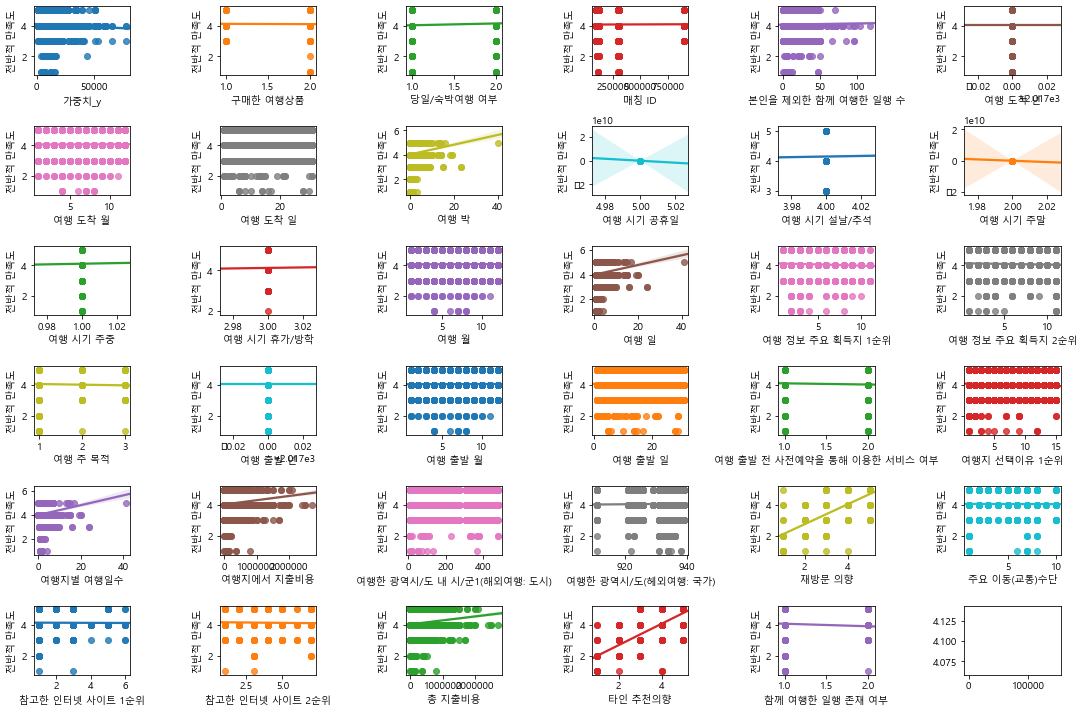

In [44]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

# 6행 6열의 subplot을 준비한다.
fig, axs = plt.subplots(figsize=(15, 10), nrows=6, ncols=6)

# 전체 컬럼들에서 종속변수 및 불필요한 컬럼을 뺀다.
features = list(data_X.columns)
features.sort()

for i, feature in enumerate(features):
    # 현재 subplot의 행/열 번호를 갱신힌다.
    r = int(i / 6)
    c = i % 6
    # 산점도와 회귀선을 그린다.
    sns.regplot(x=feature, y='전반적 만족도', data=data_5, ax=axs[r][c])

fig.tight_layout()

In [45]:
# 실행 안됨...

# plt.figure()
# sns.pairplot(data_5[list(data_X.columns) + list(data_y.columns)])
# plt.tight_layout()

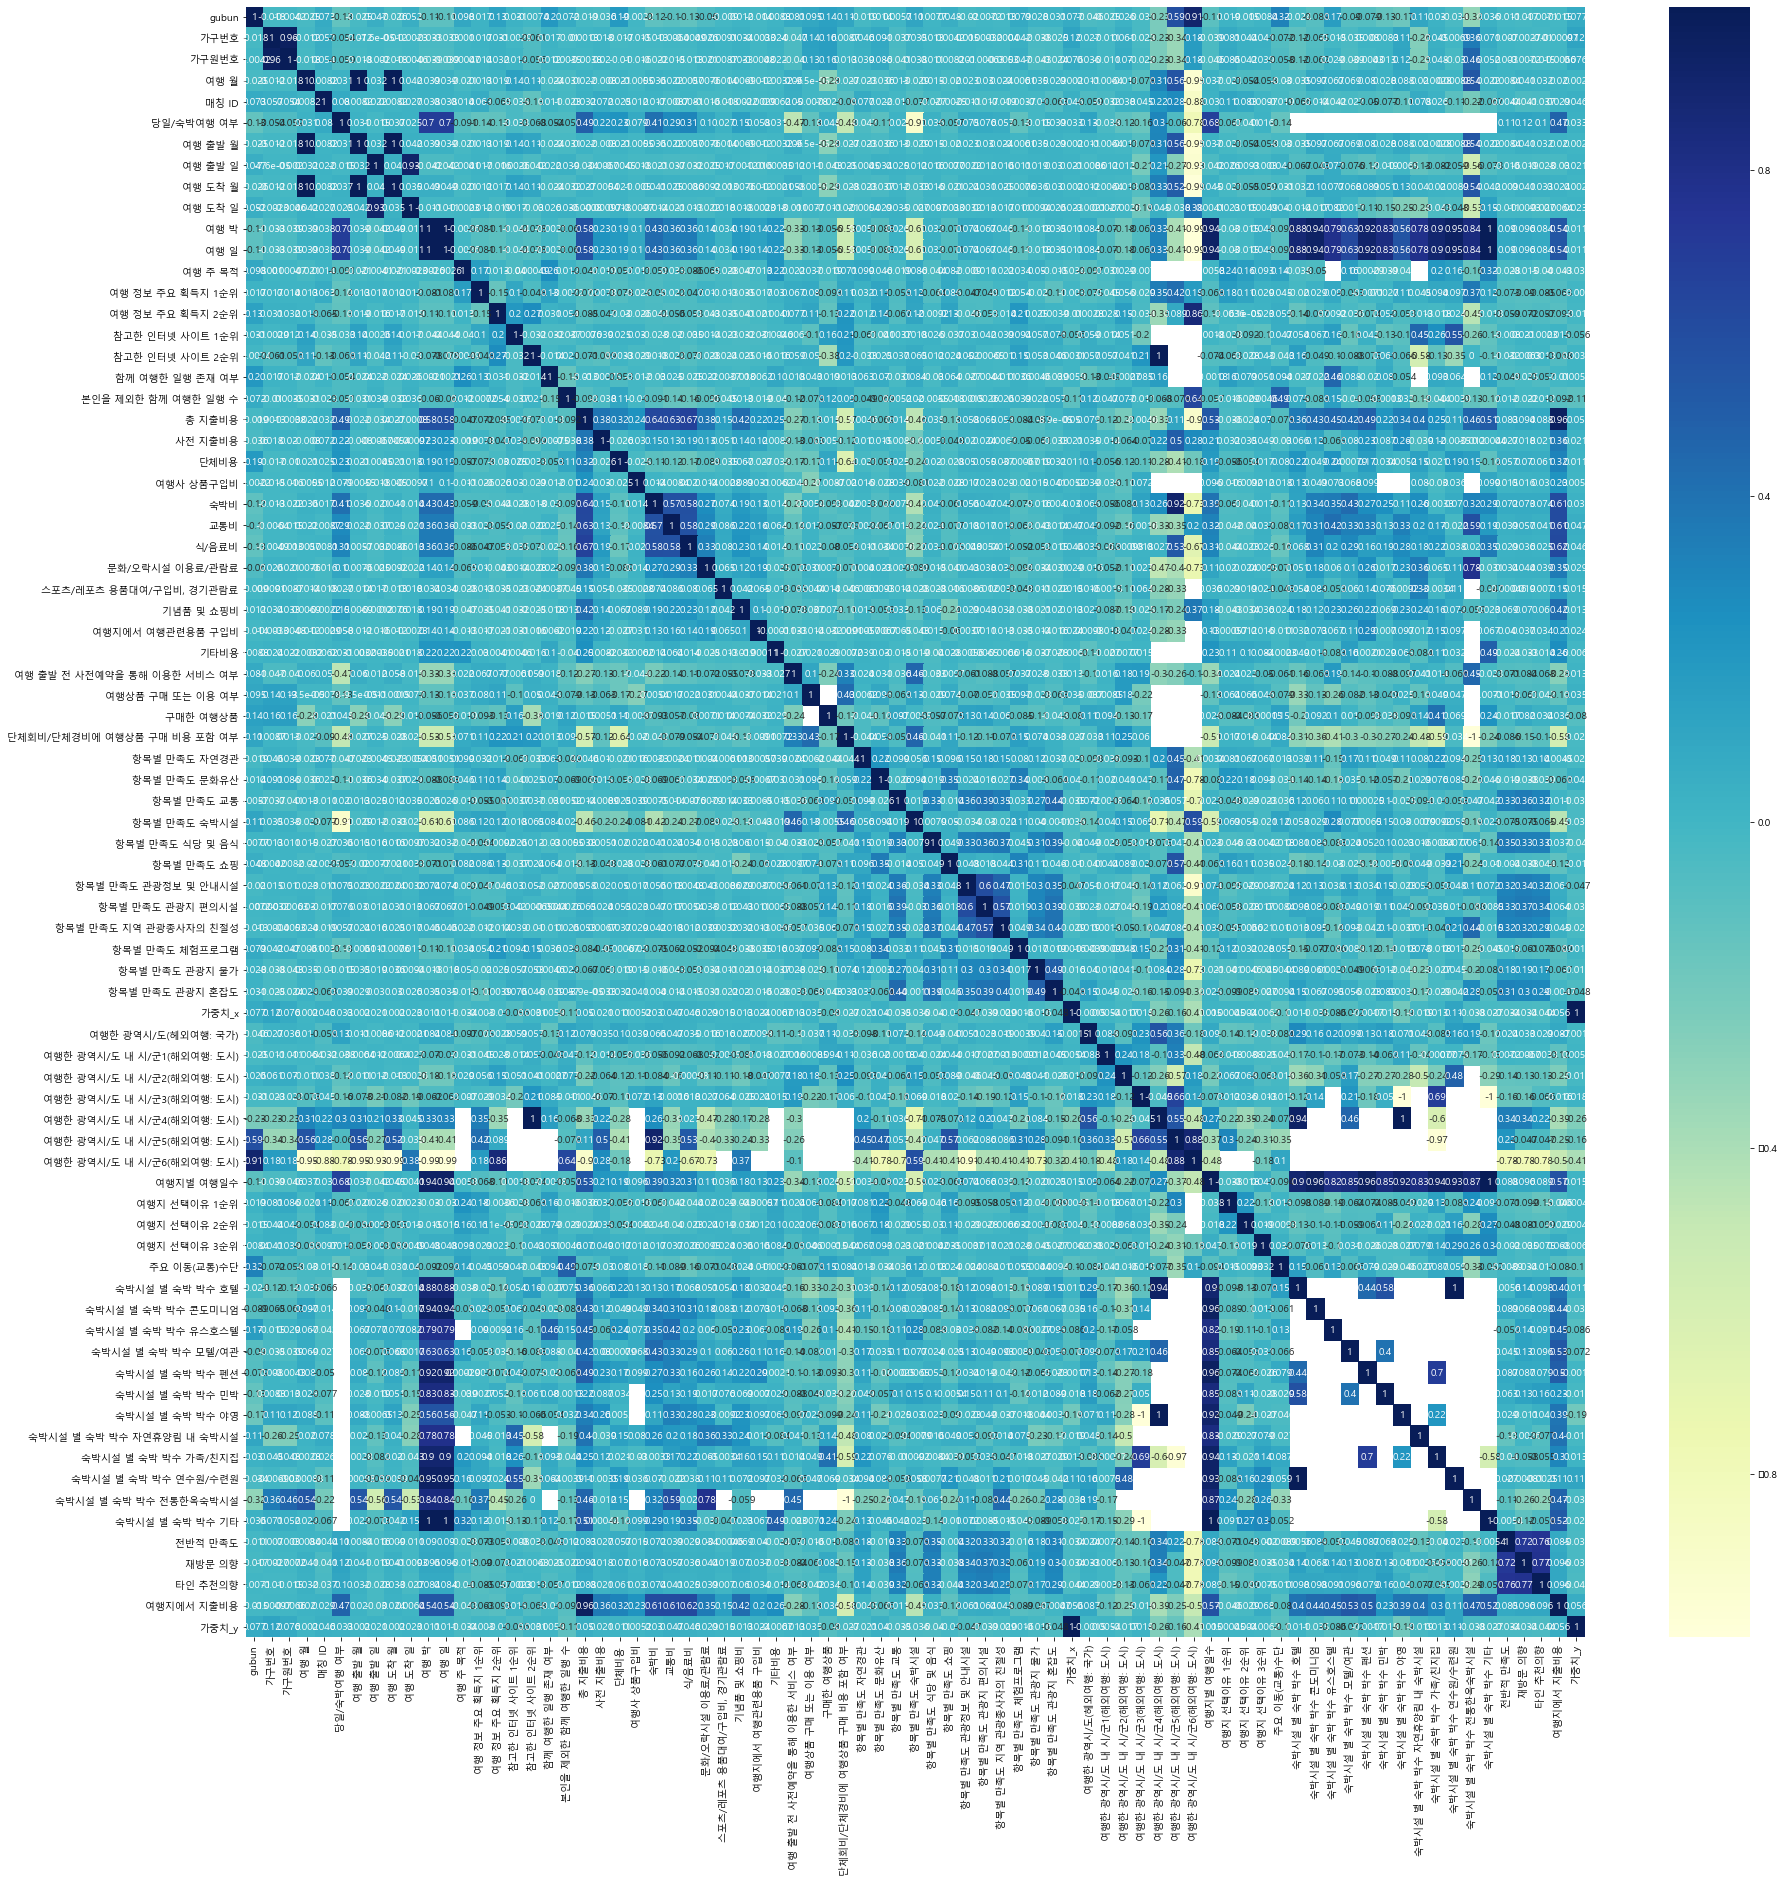

In [46]:
# 변수들 간의 상관 계수를 구한다.
# 상관관계가 모두 blank가 아닌 column만 선택

corrs = data_5[['gubun', '가구번호', '가구원번호', '여행 월', '매칭 ID',
                '당일/숙박여행 여부', '여행 출발 월', '여행 출발 일', '여행 도착 월',
                '여행 도착 일', '여행 박', '여행 일', '여행 주 목적', '여행 정보 주요 획득지 1순위',
                '여행 정보 주요 획득지 2순위', '참고한 인터넷 사이트 1순위',
                '참고한 인터넷 사이트 2순위', '함께 여행한 일행 존재 여부',
                '본인을 제외한 함께 여행한 일행 수', '총 지출비용', '사전 지출비용',
                '단체비용', '여행사 상품구입비', '숙박비', '교통비', '식/음료비',
                '문화/오락시설 이용료/관람료', '스포츠/레포츠 용품대여/구입비, 경기관람료',
                '기념품 및 쇼핑비', '여행지에서 여행관련용품 구입비', '기타비용',
                '여행 출발 전 사전예약을 통해 이용한 서비스 여부', '여행상품 구매 또는 이용 여부',
                '구매한 여행상품', '단체회비/단체경비에 여행상품 구매 비용 포함 여부',
                '항목별 만족도 자연경관', '항목별 만족도 문화유산',
                '항목별 만족도 교통', '항목별 만족도 숙박시설',
                '항목별 만족도 식당 및 음식', '항목별 만족도 쇼핑',
                '항목별 만족도 관광정보 및 안내시설', '항목별 만족도 관광지 편의시설',
                '항목별 만족도 지역 관광종사자의 친절성', '항목별 만족도 체험프로그램',
                '항목별 만족도 관광지 물가', '항목별 만족도 관광지 혼잡도', '가중치_x',
                '여행한 광역시/도(헤외여행: 국가)', '여행한 광역시/도 내 시/군1(해외여행: 도시)',
                '여행한 광역시/도 내 시/군2(해외여행: 도시)', '여행한 광역시/도 내 시/군3(해외여행: 도시)',
                '여행한 광역시/도 내 시/군4(해외여행: 도시)', '여행한 광역시/도 내 시/군5(해외여행: 도시)',
                '여행한 광역시/도 내 시/군6(해외여행: 도시)', '여행지별 여행일수', '여행지 선택이유 1순위',
                '여행지 선택이유 2순위', '여행지 선택이유 3순위', '주요 이동(교통)수단',
                '숙박시설 별 숙박 박수 호텔', '숙박시설 별 숙박 박수 콘도미니엄',
                '숙박시설 별 숙박 박수 유스호스텔', '숙박시설 별 숙박 박수 모텔/여관',
                '숙박시설 별 숙박 박수 펜션', '숙박시설 별 숙박 박수 민박', '숙박시설 별 숙박 박수 야영',
                '숙박시설 별 숙박 박수 자연휴양림 내 숙박시설', '숙박시설 별 숙박 박수 가족/친지집',
                '숙박시설 별 숙박 박수 연수원/수련원', '숙박시설 별 숙박 박수 전통한옥숙박시설',
                '숙박시설 별 숙박 박수 기타', '전반적 만족도', '재방문 의향',
                '타인 추천의향', '여행지에서 지출비용', '가중치_y'
                ]].corr()

# 상관 계수 값에 대한 히트맵을 그린다.
# annot: 맵 상에 표시할 것인지의 여부를 지정한다.
# annot_kws: 표시되는 값에 대한 추가 옵션
plt.figure(figsize=(30, 30))
sns.heatmap(corrs, annot=True, cmap='YlGnBu')
plt.show()

In [47]:
col = '여행지에서 지출비용'
display(corrs.sort_values(by=col, ascending=False)[col].head(10))
display(corrs.sort_values(by=col, ascending=False)[col].tail(10))
data_5[col].value_counts().sum()

# ('gubun', '주요 이동(교통)수단'): 0.323656
# ('여행 박', '항목별 만족도 숙박시설'): -0.605363
# ('여행 일', '항목별 만족도 숙박시설'): -0.605363
# ('본인을 제외한 함께 여행한 일행 수', '주요 이동(교통)수단'): 0.488433
# ('총 지출비용', '항목별 만족도 숙박시설'): -0.461148
# ('여행 출발 전 사전예약을 통해 이용한 서비스 여부', '항목별 만족도 숙박시설'): 0.455146
# ('여행 출발 전 사전예약을 통해 이용한 서비스 여부', '당일/숙박여행 여부'): -0.467237
# ('여행 출발 전 사전예약을 통해 이용한 서비스 여부', '여행지별 여행일수'): -0.342217
# ('여행지별 여행일수', '항목별 만족도 숙박시설'): -0.594702
# ...

여행지에서 지출비용            1.000000
총 지출비용                0.963051
식/음료비                 0.618939
숙박비                   0.610230
교통비                   0.609604
여행지별 여행일수             0.567215
여행 일                  0.540116
여행 박                  0.540116
숙박시설 별 숙박 박수 모텔/여관    0.532839
숙박시설 별 숙박 박수 기타       0.520313
Name: 여행지에서 지출비용, dtype: float64

여행한 광역시/도 내 시/군1(해외여행: 도시)    -0.118392
항목별 만족도 쇼핑                    -0.121013
여행상품 구매 또는 이용 여부              -0.131884
여행한 광역시/도 내 시/군2(해외여행: 도시)    -0.245326
여행한 광역시/도 내 시/군5(해외여행: 도시)    -0.246493
여행 출발 전 사전예약을 통해 이용한 서비스 여부   -0.278632
여행한 광역시/도 내 시/군4(해외여행: 도시)    -0.390875
항목별 만족도 숙박시설                  -0.449546
여행한 광역시/도 내 시/군6(해외여행: 도시)    -0.495423
단체회비/단체경비에 여행상품 구매 비용 포함 여부   -0.575090
Name: 여행지에서 지출비용, dtype: float64

17705

In [21]:
# [제외 컬럼 명]
# '여행 월', '여행 도착 월', '여행 도착 일', '여행 일',
# '참고한 인터넷 사이트 1순위', '참고한 인터넷 사이트 2순위' : 2167개 데이터만 존재함
# '구매한 여행상품': 1232개
# '단체회비/단체경비에 여행상품 구매 비용 포함 여부': 5469개
# '가중치_x', '가중치_y'
# '여행한 광역시/도 내 시/군2~6(해외여행: 도시)'
# '여행지별 여행일수'
# '숙박시설 별 숙박 박수 호텔' 등등
# '여행지에서 지출비용'

# '사전예약을 한 서비스 00'
# '구매한 여행상품' 관련 컬럼

# [비고]
# 값 없는 data 처리하기
# '여행지 선택이유 3순위': 없는 data 존재

data_5_sub = data_5[['gubun', '가구번호', '가구원번호', '매칭 ID', '당일/숙박여행 여부',
                     '여행 출발 월', '여행 출발 일', '여행 박', '여행 시기 주중', '여행 시기 주말',
                     '여행 시기 휴가/방학', '여행 시기 설날/추석', '여행 시기 공휴일',
                     '여행 주 목적', '여행 정보 주요 획득지 1순위',
                     '여행 정보 주요 획득지 2순위', '함께 여행한 일행 존재 여부', '본인을 제외한 함께 여행한 일행 수',
                     '동행한 사람과의 관계 친구/연인', 
                     '동행한 사람과의 관계 (직장)동료', '동행한 사람과의 관계 단체/모임', 
                     '동행한 사람과의 관계 비동거가족', '동행한 사람과의 관계 친척',
                     '동행한 사람과의 관계 기타',
                     '총 지출비용', '사전 지출비용', '단체비용', '여행사 상품구입비', '숙박비', '교통비', '식/음료비',
                     '문화/오락시설 이용료/관람료', '스포츠/레포츠 용품대여/구입비, 경기관람료', '기념품 및 쇼핑비',
                     '여행지에서 여행관련용품 구입비', '기타비용', '여행 출발 전 사전예약을 통해 이용한 서비스 여부',
                     '여행상품 구매 또는 이용 여부', '항목별 만족도 자연경관', '항목별 만족도 문화유산',
                     '항목별 만족도 교통', '항목별 만족도 숙박시설', '항목별 만족도 식당 및 음식', '항목별 만족도 쇼핑',
                     '항목별 만족도 관광정보 및 안내시설', '항목별 만족도 관광지 편의시설',
                     '항목별 만족도 지역 관광종사자의 친절성', '항목별 만족도 체험프로그램',
                     '항목별 만족도 관광지 물가', '항목별 만족도 관광지 혼잡도', '여행한 광역시/도(해외여행: 국가)',
                     '여행한 광역시/도 내 시/군1(해외여행: 도시)', '여행지 선택이유 1순위', '여행지 선택이유 2순위',
                     '여행지 선택이유 3순위', '주요 이동(교통)수단', '전반적 만족도', '재방문 의향', '타인 추천의향',
                     '숙박시설 숙박하지 않음', '숙박시설 호텔', '숙박시설 콘도미니엄', '숙박시설 유스호스텔',
                     '숙박시설 모텔/여관', '숙박시설 펜션', '숙박시설 민박', '숙박시설 야영', 
                     '숙박시설 자연휴양림 내 숙박시설', '숙박시설 가족/친지집', '숙박시설 연수원/수련원',
                     '숙박시설 전통한옥숙박시설', '숙박시설 기타','여행지에서의 활동 자연 및 풍경 감상',
                     '여행지에서의 활동 음식관광', '여행지에서의 활동 야외 위락 및 스포츠 활동',
                     '여행지에서의 활동 역사유적지 방문', '여행지에서의 활동 테마파크, 놀이시설, 동/식물원 방문',
                     '여행지에서의 활동 휴식/휴양', '여행지에서의 활동 온천/스파', '여행지에서의 활동 쇼핑',
                     '여행지에서의 활동 지역 문화예술/공연/전시시설 관람', '여행지에서의 활동 스포츠 경기 관람',
                     '여행지에서의 활동 지역 축제/이벤트 참가', '여행지에서의 활동 교육/체험프로그램 참가',
                     '여행지에서의 활동 종교/성지순례', '여행지에서의 활동 갬블링', '여행지에서의 활동 시티투어',
                     '여행지에서의 활동 드라마 촬영지 방문', '여행지에서의 활동 가족/친지/친구 방문',
                     '여행지에서의 활동 회의참가/시찰', '여행지에서의 활동 교육/훈련/연수', 
                     '여행지에서의 활동 유흥/오락', '여행지에서의 활동 기타'
                     ]]

In [22]:
# '여행 시기 주중', '여행 시기 주말', '여행 시기 휴가/방학', '여행 시기 설날/추석', '여행 시기 공휴일'
# NaN값 제거한 뒤에 0, 1로 바꿔서 전처리

data_5_sub.iloc[:, 8:13]

,여행 시기 주중,여행 시기 주말,여행 시기 휴가/방학,여행 시기 설날/추석,여행 시기 공휴일
1,1.0,2.0,3.0,NaN,NaN
2,1.0,2.0,NaN,NaN,NaN
4,NaN,NaN,NaN,4.0,NaN
8,1.0,2.0,3.0,NaN,NaN
9,NaN,2.0,NaN,NaN,NaN
10,NaN,2.0,NaN,NaN,NaN
12,NaN,NaN,NaN,4.0,NaN
13,NaN,2.0,NaN,NaN,NaN
14,1.0,NaN,NaN,NaN,NaN
16,1.0,NaN,NaN,NaN,NaN


In [25]:
def get_preprocessed_df(df):
    df_copy = df.copy()
    stays = list(df_copy.columns)
    for stay in stays:
        df_copy[stay] = df_copy[stay].apply(lambda x: 1 if x>0 else 0)
    return df_copy

In [26]:
data_5_sub.iloc[:, 8:13] = get_preprocessed_df(data_5_sub.iloc[:, 8:13])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [27]:
data_5_sub.reset_index(inplace=True)

In [28]:
data_5_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17705 entries, 0 to 17704
Data columns (total 94 columns):
index                             17705 non-null int64
gubun                             17705 non-null float64
가구번호                              17705 non-null int64
가구원번호                             17705 non-null int64
매칭 ID                             17705 non-null float64
당일/숙박여행 여부                        17705 non-null float64
여행 출발 월                           17705 non-null float64
여행 출발 일                           17705 non-null float64
여행 박                              17705 non-null float64
여행 시기 주중                          17705 non-null int64
여행 시기 주말                          17705 non-null int64
여행 시기 휴가/방학                       17705 non-null int64
여행 시기 설날/추석                       17705 non-null int64
여행 시기 공휴일                         17705 non-null int64
여행 주 목적                           17705 non-null float64
여행 정보 주요 획득지 1순위                  17705 non-null flo

In [29]:
# '동행한 사람과의 관계 친구/연인':'동행한 사람과의 관계 기타'
# NaN값 제거한 뒤에 0, 1로 바꿔서 전처리

data_5_sub.loc[:, '동행한 사람과의 관계 친구/연인':'동행한 사람과의 관계 기타']

,동행한 사람과의 관계 친구/연인,동행한 사람과의 관계 (직장)동료,동행한 사람과의 관계 단체/모임,동행한 사람과의 관계 비동거가족,동행한 사람과의 관계 친척,동행한 사람과의 관계 기타
0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,1.0,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
data_5_sub.loc[:, '동행한 사람과의 관계 친구/연인':'동행한 사람과의 관계 기타'] = \
    get_preprocessed_df(
        data_5_sub.loc[:, '동행한 사람과의 관계 친구/연인':'동행한 사람과의 관계 기타'])

In [31]:
data_5_sub.loc[:, '동행한 사람과의 관계 친구/연인':'동행한 사람과의 관계 기타']

,동행한 사람과의 관계 친구/연인,동행한 사람과의 관계 (직장)동료,동행한 사람과의 관계 단체/모임,동행한 사람과의 관계 비동거가족,동행한 사람과의 관계 친척,동행한 사람과의 관계 기타
0,0,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,1,0,0,0,0,0
5,0,0,0,0,0,0
6,0,0,0,0,0,0
7,1,0,0,0,0,0
8,0,0,0,0,0,0
9,0,0,0,0,0,0


In [63]:
data_5_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17705 entries, 0 to 17704
Data columns (total 94 columns):
index                             17705 non-null int64
gubun                             17705 non-null float64
가구번호                              17705 non-null int64
가구원번호                             17705 non-null int64
매칭 ID                             17705 non-null float64
당일/숙박여행 여부                        17705 non-null float64
여행 출발 월                           17705 non-null float64
여행 출발 일                           17705 non-null float64
여행 박                              17705 non-null float64
여행 시기 주중                          17705 non-null int64
여행 시기 주말                          17705 non-null int64
여행 시기 휴가/방학                       17705 non-null int64
여행 시기 설날/추석                       17705 non-null int64
여행 시기 공휴일                         17705 non-null int64
여행 주 목적                           17705 non-null float64
여행 정보 주요 획득지 1순위                  17705 non-null flo

In [32]:
data_5_sub[[s for s in data_5_sub.columns if '여행지 선택이유' in s]]

,여행지 선택이유 1순위,여행지 선택이유 2순위,여행지 선택이유 3순위
0,7.0,1.0,2.0
1,1.0,5.0,7.0
2,1.0,2.0,3.0
3,7.0,1.0,2.0
4,3.0,5.0,13.0
5,1.0,2.0,3.0
6,1.0,2.0,3.0
7,1.0,3.0,7.0
8,1.0,4.0,9.0
9,1.0,4.0,9.0


In [33]:
# 여행지 선택이유 2순위, 3순위 null값 컬럼 제거
# 2순위 null값 하나 제외하고 다 3순위 null값에 포함

pick_2 = set(data_5_sub[(data_5_sub['여행지 선택이유 2순위'].isnull())].index)
pick_3 = set(data_5_sub[(data_5_sub['여행지 선택이유 3순위'].isnull())].index)

print(len(pick_2), len(pick_3))
print(len(pick_2 & pick_3))
print(pick_2 - pick_3)

260 409
259
{15207}


In [34]:
# index 컬럼 왜 생겼지?? => 제거

data_5_sub.drop('index', axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [35]:
# 여행지 선택이유 2순위, 3순위 null값 컬럼 제거

data_5_sub.drop(data_5_sub.index[list(data_5_sub.loc[pick_2 | pick_3].index)],
                inplace=True)

In [36]:
# 숙박시설 컬럼 OneHot 인코딩으로 처리

temp_df = data_5_sub[[s for s in data_5_sub.columns if '숙박시설' in s]]
temp_df.head()

,항목별 만족도 숙박시설,숙박시설 숙박하지 않음,숙박시설 호텔,숙박시설 콘도미니엄,숙박시설 유스호스텔,숙박시설 모텔/여관,숙박시설 펜션,숙박시설 민박,숙박시설 야영,숙박시설 자연휴양림 내 숙박시설,숙박시설 가족/친지집,숙박시설 연수원/수련원,숙박시설 전통한옥숙박시설,숙박시설 기타
0,4.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
temp_df = get_preprocessed_df(temp_df)
temp_df

,항목별 만족도 숙박시설,숙박시설 숙박하지 않음,숙박시설 호텔,숙박시설 콘도미니엄,숙박시설 유스호스텔,숙박시설 모텔/여관,숙박시설 펜션,숙박시설 민박,숙박시설 야영,숙박시설 자연휴양림 내 숙박시설,숙박시설 가족/친지집,숙박시설 연수원/수련원,숙박시설 전통한옥숙박시설,숙박시설 기타
0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0,0,0,0,0
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
data_5_sub[[s for s in data_5_sub.columns if '숙박시설' in s]] = temp_df
data_5_sub.info()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17295 entries, 0 to 17704
Data columns (total 93 columns):
gubun                             17295 non-null float64
가구번호                              17295 non-null int64
가구원번호                             17295 non-null int64
매칭 ID                             17295 non-null float64
당일/숙박여행 여부                        17295 non-null float64
여행 출발 월                           17295 non-null float64
여행 출발 일                           17295 non-null float64
여행 박                              17295 non-null float64
여행 시기 주중                          17295 non-null int64
여행 시기 주말                          17295 non-null int64
여행 시기 휴가/방학                       17295 non-null int64
여행 시기 설날/추석                       17295 non-null int64
여행 시기 공휴일                         17295 non-null int64
여행 주 목적                           17295 non-null float64
여행 정보 주요 획득지 1순위                  17295 non-null float64
여행 정보 주요 획득지 2순위                  17295 non-null f

In [39]:
# 여행지에서의 활동 컬럼 OneHot 인코딩으로 처리

temp_df = data_5_sub[[s for s in data_5_sub.columns if '여행지에서의 활동' in s]]
temp_df.head()

,여행지에서의 활동 자연 및 풍경 감상,여행지에서의 활동 음식관광,여행지에서의 활동 야외 위락 및 스포츠 활동,여행지에서의 활동 역사유적지 방문,"여행지에서의 활동 테마파크, 놀이시설, 동/식물원 방문",여행지에서의 활동 휴식/휴양,여행지에서의 활동 온천/스파,여행지에서의 활동 쇼핑,여행지에서의 활동 지역 문화예술/공연/전시시설 관람,여행지에서의 활동 스포츠 경기 관람,...,여행지에서의 활동 교육/체험프로그램 참가,여행지에서의 활동 종교/성지순례,여행지에서의 활동 갬블링,여행지에서의 활동 시티투어,여행지에서의 활동 드라마 촬영지 방문,여행지에서의 활동 가족/친지/친구 방문,여행지에서의 활동 회의참가/시찰,여행지에서의 활동 교육/훈련/연수,여행지에서의 활동 유흥/오락,여행지에서의 활동 기타
0,1.0,2.0,3.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,3.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,2.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
temp_df = get_preprocessed_df(temp_df)
temp_df

,여행지에서의 활동 자연 및 풍경 감상,여행지에서의 활동 음식관광,여행지에서의 활동 야외 위락 및 스포츠 활동,여행지에서의 활동 역사유적지 방문,"여행지에서의 활동 테마파크, 놀이시설, 동/식물원 방문",여행지에서의 활동 휴식/휴양,여행지에서의 활동 온천/스파,여행지에서의 활동 쇼핑,여행지에서의 활동 지역 문화예술/공연/전시시설 관람,여행지에서의 활동 스포츠 경기 관람,...,여행지에서의 활동 교육/체험프로그램 참가,여행지에서의 활동 종교/성지순례,여행지에서의 활동 갬블링,여행지에서의 활동 시티투어,여행지에서의 활동 드라마 촬영지 방문,여행지에서의 활동 가족/친지/친구 방문,여행지에서의 활동 회의참가/시찰,여행지에서의 활동 교육/훈련/연수,여행지에서의 활동 유흥/오락,여행지에서의 활동 기타
0,1,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
data_5_sub[[s for s in data_5_sub.columns if '여행지에서의 활동' in s]] = temp_df
data_5_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17295 entries, 0 to 17704
Data columns (total 93 columns):
gubun                             17295 non-null float64
가구번호                              17295 non-null int64
가구원번호                             17295 non-null int64
매칭 ID                             17295 non-null float64
당일/숙박여행 여부                        17295 non-null float64
여행 출발 월                           17295 non-null float64
여행 출발 일                           17295 non-null float64
여행 박                              17295 non-null float64
여행 시기 주중                          17295 non-null int64
여행 시기 주말                          17295 non-null int64
여행 시기 휴가/방학                       17295 non-null int64
여행 시기 설날/추석                       17295 non-null int64
여행 시기 공휴일                         17295 non-null int64
여행 주 목적                           17295 non-null float64
여행 정보 주요 획득지 1순위                  17295 non-null float64
여행 정보 주요 획득지 2순위                  17295 non-null f

In [42]:
# 인덱스 초기화

data_5_sub.reset_index(inplace=True)

In [110]:
data_5_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17295 entries, 0 to 17294
Data columns (total 94 columns):
index                             17295 non-null int64
gubun                             17295 non-null float64
가구번호                              17295 non-null int64
가구원번호                             17295 non-null int64
매칭 ID                             17295 non-null float64
당일/숙박여행 여부                        17295 non-null float64
여행 출발 월                           17295 non-null float64
여행 출발 일                           17295 non-null float64
여행 박                              17295 non-null float64
여행 시기 주중                          17295 non-null int64
여행 시기 주말                          17295 non-null int64
여행 시기 휴가/방학                       17295 non-null int64
여행 시기 설날/추석                       17295 non-null int64
여행 시기 공휴일                         17295 non-null int64
여행 주 목적                           17295 non-null float64
여행 정보 주요 획득지 1순위                  17295 non-null flo

In [43]:
data_5_sub.to_csv('C:/Users/user/Desktop/kdata/프로젝트/data_5_preprocessed1.csv', encoding='cp949')

In [44]:
data_0_01.head()

,가구번호,주택유형,거주시도,지역규모,가구내 가구원수,년 평균 가구소득,월 평균 가구소득,가중치
0,10001,2,1,1,4,4000,333.333333,4574.786034
1,10002,1,1,1,3,4000,333.000000,8885.036900
2,10003,1,1,1,3,2500,208.000000,8111.584424
3,10004,1,1,1,2,3000,250.000000,9151.613207
4,10006,2,1,1,3,8000,667.000000,12508.005479


In [45]:
data_0_02.head()

,가구번호,가구원번호,성별,연령,주택유형,거주시도,지역규모,최종학력,졸업여부,직업(텍스트),직업분류1,직업분류2,가구내 가구원수,혼인상태,년 평균 가구소득,월 평균 가구소득,가중치
0,10001,1000101,1,40,2,1,1,5,5,NaN,2,8,4,2,4000,333.333333,6201.607951
1,10001,1000102,2,40,2,1,1,4,1,NaN,11,9,4,2,4000,333.333333,5886.547371
2,10002,1000201,1,41,1,1,1,6,1,NaN,4,3,3,1,4000,333.000000,12044.610408
3,10002,1000202,2,73,1,1,1,2,1,NaN,11,9,3,3,4000,333.000000,5436.667739
4,10002,1000203,2,46,1,1,1,4,1,NaN,9,5,3,2,4000,333.000000,12405.209670


In [46]:
data_05 = pd.merge(data_5_sub, data_0_02, on=["가구번호","가구원번호"], how = 'left')

In [47]:
data_05.head()

,index,gubun,가구번호,가구원번호,매칭 ID,당일/숙박여행 여부,여행 출발 월,여행 출발 일,여행 박,여행 시기 주중,...,최종학력,졸업여부,직업(텍스트),직업분류1,직업분류2,가구내 가구원수,혼인상태,년 평균 가구소득,월 평균 가구소득,가중치
0,0,1.0,10001,1000101,101372.0,2.0,7.0,1.0,6.0,1,...,5,5,NaN,2,8,4,2,4000,333.333333,6201.607951
1,1,2.0,10001,1000101,115439.0,2.0,8.0,4.0,1.0,1,...,5,5,NaN,2,8,4,2,4000,333.333333,6201.607951
2,2,1.0,10001,1000101,115437.0,1.0,10.0,5.0,0.0,0,...,5,5,NaN,2,8,4,2,4000,333.333333,6201.607951
3,3,1.0,10001,1000102,101372.0,2.0,7.0,1.0,6.0,1,...,4,1,NaN,11,9,4,2,4000,333.333333,5886.547371
4,4,1.0,10001,1000102,101365.0,1.0,8.0,5.0,0.0,0,...,4,1,NaN,11,9,4,2,4000,333.333333,5886.547371


In [49]:
data_05.to_csv('C:/Users/user/Desktop/kdata/프로젝트/data_5_personal_info_added.csv', encoding='cp949')